In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
df = pd.read_csv('Data/dataset.csv')
severity = pd.read_csv('Data/Symptom-severity.csv')
description = pd.read_csv('Data/symptom_Description.csv')
precaution = pd.read_csv('Data/symptom_precaution.csv')

In [44]:
print(df.shape)
df.head()

(4920, 18)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df['Disease'].nunique()

41

In [46]:
print(severity.shape)
severity.head()

(133, 2)


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [47]:
severity['weight'].value_counts()


4    39
5    35
3    21
6    17
2    15
7     5
1     1
Name: weight, dtype: int64

In [48]:
severity['Symptom'].value_counts()


fluid_overload          2
small_dents_in_nails    1
anxiety                 1
malaise                 1
ulcers_on_tongue        1
                       ..
headache                1
swollen_legs            1
dark_urine              1
bloody_stool            1
yellow_urine            1
Name: Symptom, Length: 132, dtype: int64

In [49]:
severity[severity['Symptom']=='fluid_overload']


,Symptom,weight
45,fluid_overload,6
117,fluid_overload,4


In [50]:
print(description.shape)
description.head()

(41, 2)


,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [51]:
description['Disease'].nunique()

41

In [52]:
print(precaution.shape)
precaution.head()

(41, 5)


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [53]:
precaution['Disease'].nunique()

41

In [54]:
precaution.isna().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

In [55]:
precaution.dropna(inplace=True)

In [56]:
precaution.isna().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    0
Precaution_4    0
dtype: int64

In [58]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_description = pd.merge(df,description,on='Disease') #combining 2 dataframes
print(df_description.shape)
df_description.head()

(4800, 19)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."


In [60]:
combined_df = pd.merge(df_description,precaution,on='Disease') #combining another one

In [61]:
combined_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [62]:
combined_df = combined_df.fillna(0)

In [63]:
vals = combined_df.values
symptoms = severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = severity[severity['Symptom'] == symptoms[i]]['weight'].values[0]
    
cols = combined_df.columns
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,1,3,4,dischromic _patches,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,3,4,dischromic _patches,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,1,4,dischromic _patches,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,1,3,dischromic _patches,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [73]:
dd = d.iloc[:,1:18]
ddList = dd.values

In [81]:
list(set([ j for i in ddList.tolist() for j in i if type(j)==str]))

['dischromic _patches', 'foul_smell_of urine', 'spotting_ urination']

In [120]:
severity

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [122]:
severity.loc[133] = 'dischromic _patches', 0

In [124]:
severity.loc[134] = 'spotting_ urination', 0

In [125]:
severity.loc[135] = 'foul_smell_of urine', 0

In [133]:
severity['Symptom'].value_counts()

small_dents_in_nails     1
passage_of_gases         1
irritability             1
acidity                  1
irregular_sugar_level    1
                        ..
lethargy                 1
headache                 1
swollen_legs             1
dark_urine               1
yellow_urine             1
Name: Symptom, Length: 135, dtype: int64

In [132]:
severity.drop_duplicates(['Symptom'],keep='last',inplace=True)

In [134]:
severity.to_csv("severityUpdates.csv")

In [82]:
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [85]:
df.isna().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0
Description     0
Precaution_1    0
Precaution_2    0
Precaution_3    0
Precaution_4    0
dtype: int64

In [84]:
df.to_csv("Data_severity_Description_Precaution.csv")

In [218]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [86]:
df['Disease'].unique()

array(['Fungal infection', 'GERD', 'Chronic cholestasis', 'Drug Reaction',
       'Peptic ulcer diseae', 'AIDS', 'Gastroenteritis',
       'Bronchial Asthma', 'Migraine', 'Cervical spondylosis',
       'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria',
       'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B',
       'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis',
       'Tuberculosis', 'Common Cold', 'Pneumonia', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [87]:
data = df.iloc[:,1:18].values
labels = df['Disease'].values

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [89]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3672, 17) (648, 17) (3672,) (648,)


In [92]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [93]:
preds = model.predict(x_test)

F1-score% = 96.46612154566844 | Accuracy% = 96.4506172839506


<AxesSubplot:>

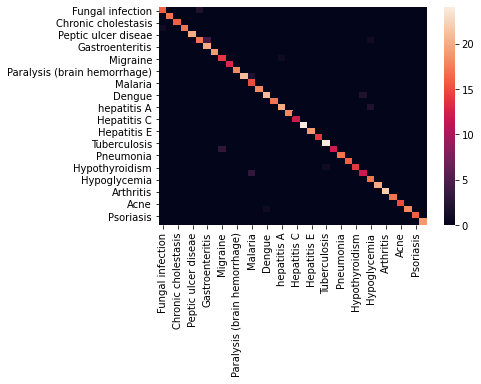

In [94]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [97]:
rf = RandomForestClassifier()

In [98]:
#you can narrow down the values as you keep training
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [99]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42)

In [101]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   52.8s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [102]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [103]:
#using my best parameters
rf = RandomForestClassifier(bootstrap=True,
                            max_depth=30,
                            max_features= 'sqrt',
                            min_samples_leaf= 1,
                            min_samples_split= 5,
                            n_estimators= 1400)

In [105]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400)

In [107]:
y_pred = rf.predict(x_test)


F1-score% = 99.70012626262626 | Accuracy% = 99.69135802469135


<AxesSubplot:>

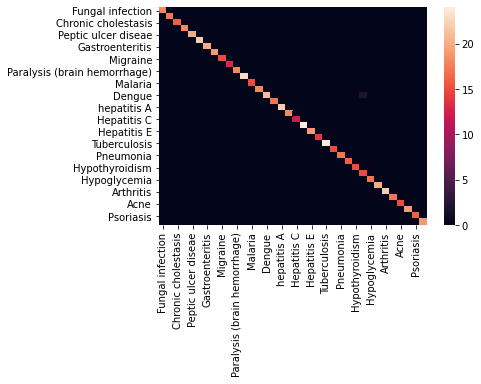

In [115]:
conf_mat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, y_pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, y_pred)*100)
sns.heatmap(df_cm)

In [108]:
y_pred[:5]

array(['Chicken pox', 'Pneumonia', 'Gastroenteritis', 'AIDS',
       'Chicken pox'], dtype=object)

In [110]:
y_test[:5]

array(['Chicken pox', 'Pneumonia', 'Gastroenteritis', 'AIDS',
       'Chicken pox'], dtype=object)

In [111]:
accuracy_score(y_test,y_pred)

0.9969135802469136

In [116]:
df.iloc[:,1:18]

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0
4316,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0
4317,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0
4318,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
severity = pd.read_csv("severityUpdates.csv")

In [138]:
del severity['Unnamed: 0']

In [152]:
severityDict = {}
for i in range(len(severity)):
    a = {severity['Symptom'][i]:severity['weight'][i]}
    severityDict.update(a)
    

In [155]:
AllSymptoms = ['abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic _patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sugar_level',
 'irritability',
 'irritation_in_anus',
 'joint_pain',
 'knee_pain',
 'lack_of_concentration',
 'lethargy',
 'loss_of_appetite',
 'loss_of_balance',
 'loss_of_smell',
 'malaise',
 'mild_fever',
 'mood_swings',
 'movement_stiffness',
 'mucoid_sputum',
 'muscle_pain',
 'muscle_wasting',
 'muscle_weakness',
 'nausea',
 'neck_pain',
 'nodal_skin_eruptions',
 'obesity',
 'pain_behind_the_eyes',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'painful_walking',
 'palpitations',
 'passage_of_gases',
 'patches_in_throat',
 'phlegm',
 'polyuria',
 'prominent_veins_on_calf',
 'puffy_face_and_eyes',
 'pus_filled_pimples',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'red_sore_around_nose',
 'red_spots_over_body',
 'redness_of_eyes',
 'restlessness',
 'runny_nose',
 'rusty_sputum',
 'scurring',
 'shivering',
 'silver_like_dusting',
 'sinus_pressure',
 'skin_peeling',
 'skin_rash',
 'slurred_speech',
 'small_dents_in_nails',
 'spinning_movements',
 'spotting_ urination',
 'stiff_neck',
 'stomach_bleeding',
 'stomach_pain',
 'sunken_eyes',
 'sweating',
 'swelled_lymph_nodes',
 'swelling_joints',
 'swelling_of_stomach',
 'swollen_blood_vessels',
 'swollen_extremeties',
 'swollen_legs',
 'throat_irritation',
 'toxic_look_(typhos)',
 'ulcers_on_tongue',
 'unsteadiness',
 'visual_disturbances',
 'vomiting',
 'watering_from_eyes',
 'weakness_in_limbs',
 'weakness_of_one_body_side',
 'weight_gain',
 'weight_loss',
 'yellow_crust_ooze',
 'yellow_urine',
 'yellowing_of_eyes',
 'yellowish_skin',
 'itching']

In [156]:
severityDict

{'itching': 1,
 'skin_rash': 3,
 'nodal_skin_eruptions': 4,
 'continuous_sneezing': 4,
 'shivering': 5,
 'chills': 3,
 'joint_pain': 3,
 'stomach_pain': 5,
 'acidity': 3,
 'ulcers_on_tongue': 4,
 'muscle_wasting': 3,
 'vomiting': 5,
 'burning_micturition': 6,
 'spotting_urination': 6,
 'fatigue': 4,
 'weight_gain': 3,
 'anxiety': 4,
 'cold_hands_and_feets': 5,
 'mood_swings': 3,
 'weight_loss': 3,
 'restlessness': 5,
 'lethargy': 2,
 'patches_in_throat': 6,
 'irregular_sugar_level': 5,
 'cough': 4,
 'high_fever': 7,
 'sunken_eyes': 3,
 'breathlessness': 4,
 'sweating': 3,
 'dehydration': 4,
 'indigestion': 5,
 'headache': 3,
 'yellowish_skin': 3,
 'dark_urine': 4,
 'nausea': 5,
 'loss_of_appetite': 4,
 'pain_behind_the_eyes': 4,
 'back_pain': 3,
 'constipation': 4,
 'abdominal_pain': 4,
 'diarrhoea': 6,
 'mild_fever': 5,
 'yellow_urine': 4,
 'yellowing_of_eyes': 4,
 'acute_liver_failure': 6,
 'swelling_of_stomach': 7,
 'swelled_lymph_nodes': 6,
 'malaise': 6,
 'blurred_and_distorted_vi

In [189]:
data1 = pd.read_csv('Data/dataset.csv')

In [190]:
data1.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
Symptoms = data1.iloc[4915,1:18].values
Symptoms

array([' vomiting', ' headache', ' nausea', ' spinning_movements',
       ' loss_of_balance', ' unsteadiness', nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan], dtype=object)

In [192]:

def create_test_data(severityDict, Symptoms):
    w = [severityDict[i.strip()] if str(i) != 'nan' else 0 for i in Symptoms]
    return [w]


w = create_test_data(severityDict, Symptoms)
prediction = rf.predict(w)

print("Prediction : ", prediction[0])

Prediction :  (vertigo) Paroymsal  Positional Vertigo


In [212]:
data_Pred = df[df['Disease']==prediction[0]].loc[:,'Description':]

In [221]:
# Description for predicted Disease
data_Pred.values[0][0]

"Benign paroxysmal positional vertigo (BPPV) is one of the most common causes of vertigo — the sudden sensation that you're spinning or that the inside of your head is spinning. Benign paroxysmal positional vertigo causes brief episodes of mild to intense dizziness."

In [219]:
# 4 Precaution for predicted Disease
data_Pred.values[0][1:].tolist()

['lie down',
 'avoid sudden change in body',
 'avoid abrupt head movment',
 'relax']

In [220]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,Impetigo,3,7,4,2,3,0,0,0,0,...,0,0,0,0,0,Impetigo (im-puh-TIE-go) is a common and highl...,soak affected area in warm water,use antibiotics,remove scabs with wet compressed cloth,consult doctor
4316,Impetigo,3,7,4,2,3,0,0,0,0,...,0,0,0,0,0,Impetigo (im-puh-TIE-go) is a common and highl...,soak affected area in warm water,use antibiotics,remove scabs with wet compressed cloth,consult doctor
4317,Impetigo,3,7,4,2,3,0,0,0,0,...,0,0,0,0,0,Impetigo (im-puh-TIE-go) is a common and highl...,soak affected area in warm water,use antibiotics,remove scabs with wet compressed cloth,consult doctor
4318,Impetigo,3,7,4,2,3,0,0,0,0,...,0,0,0,0,0,Impetigo (im-puh-TIE-go) is a common and highl...,soak affected area in warm water,use antibiotics,remove scabs with wet compressed cloth,consult doctor
